In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
print('Training dataset shape :' , x_train.shape , ": ", y_train.shape)

print('Testing dataset shape :' , x_test.shape , ": ", y_test.shape)

Training dataset shape : (50000, 32, 32, 3) :  (50000, 1)
Testing dataset shape : (10000, 32, 32, 3) :  (10000, 1)


In [ ]:
x_train = x_train.astype("float32")/255.0

x_test = x_test.astype("float32")/255.0


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(32,32,3) , name="InputLayer")

        ,layers.Conv2D(128,(3,3),padding='valid', activation='tanh',name='Conv_Layer1')
        #128=> number of activation neurons
        #(3,3)=> Filter dimension
     

        #Calculate the shape for each layer
          #Image: (32x32x3) ; Filter(3x3) ; stride=1
          #(n-f+1) x (n-f+1) x F
          #(32-3+1) x(32-3+1)
          #(30,30)

        #Calcualte the # of parameters
          #Filter Dimension: (3x3)
          #Number of channels: 3 {R|G|B}
          #Number of Activations:128
          # Number of parameters : (FilterDimension * Number of channels +1 ) * Number of Activations
          # (3 x3 x 3 + 1) x 128
          #3584

        ,layers.MaxPool2D(pool_size=(2,2),name="MaxPooling_Layer1")

        #Calculate the shape for each layer
          #Image: (30x30) ;
          #Pooling Layer:2x2
          #30/2 x 30x2 = (15,15)

        ,layers.Conv2D(64,(3,3),padding='valid', activation='tanh',name='Conv_Layer2')

         #Calculate the shape for each layer
          #Image: (15x15) ; Filter(3x3) ; stride=1
          #(n-f+1) x (n-f+1) x F
          #(15-3+1) x(15-3+1)
          #(13,13)

        #Calcualte the # of parameters
          #Filter Dimension: (3x3)
          #Number of channels: 128 
          #Number of Activations:64
          # Number of parameters : (FilterDimension * Number of channels +1 ) * Number of Activations
          # (3 x3 x 128 + 1) x 64
          #73792

        ,layers.MaxPool2D(pool_size=(2,2),name="MaxPooling_Layer2")

         #Calculate the shape for each layer
          #Image: (13x13) ;
          #Pooling Layer:2x2
          #30/2 x 30x2 = (6,6)

        ,layers.Conv2D(32,(3,3),padding='valid', activation='tanh',name='Conv_Layer3')

        #Calculate the shape for each layer
          #Image: (6x6) ; Filter(3x3) ; stride=1
          #(n-f+1) x (n-f+1) x F
          #(6-3+1) x(6-3+1)
          #(4,4)

        #Calcualte the # of parameters
          #Filter Dimension: (3x3)
          #Number of channels: 64 
          #Number of Activations:32
          # Number of parameters : (FilterDimension * Number of channels +1 ) * Number of Activations
          # (3 x3 x 64 + 1) x 32
          #18464

        ,layers.MaxPool2D(pool_size=(2,2),name="MaxPooling_Layer3")

        #Calculate the shape for each layer
          #Image: (4x4) ;
          #Pooling Layer:2x2
          #30/2 x 30x2 = (2,2)

        ,layers.Flatten()

        ,layers.Dense(128,activation='relu',name='Hidden_Layer1')

        # 128*128 + 128
        #=16512
     

        ,layers.Dense(64,activation='relu',name='Hidden_Layer2')
        # 128*64 + 64
        #=8256


        ,layers.Dense(32,activation='relu',name='Hidden_Layer3')
        # 64*32 + 32
        #=2080

        ,layers.Dense(10,activation='softmax',name='Output_Layer')
        # 32*10 + 10
        #=330
    ]

)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_Layer1 (Conv2D)        (None, 30, 30, 128)       3584      
                                                                 
 MaxPooling_Layer1 (MaxPooli  (None, 15, 15, 128)      0         
 ng2D)                                                           
                                                                 
 Conv_Layer2 (Conv2D)        (None, 13, 13, 64)        73792     
                                                                 
 MaxPooling_Layer2 (MaxPooli  (None, 6, 6, 64)         0         
 ng2D)                                                           
                                                                 
 Conv_Layer3 (Conv2D)        (None, 4, 4, 32)          18464     
                                                                 
 MaxPooling_Layer3 (MaxPooli  (None, 2, 2, 32)         0

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    ,optimizer=keras.optimizers.Adam()
    ,metrics=["accuracy"]
)

In [ ]:
model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=2)

Epoch 1/20
391/391 - 4s - loss: 0.6808 - accuracy: 0.7585 - 4s/epoch - 10ms/step
Epoch 2/20
391/391 - 4s - loss: 0.6581 - accuracy: 0.7683 - 4s/epoch - 10ms/step
Epoch 3/20
391/391 - 4s - loss: 0.6251 - accuracy: 0.7799 - 4s/epoch - 10ms/step
Epoch 4/20
391/391 - 4s - loss: 0.6028 - accuracy: 0.7849 - 4s/epoch - 10ms/step
Epoch 5/20
391/391 - 4s - loss: 0.5735 - accuracy: 0.7958 - 4s/epoch - 10ms/step
Epoch 6/20
391/391 - 4s - loss: 0.5522 - accuracy: 0.8030 - 4s/epoch - 10ms/step
Epoch 7/20
391/391 - 4s - loss: 0.5270 - accuracy: 0.8133 - 4s/epoch - 10ms/step
Epoch 8/20
391/391 - 4s - loss: 0.5061 - accuracy: 0.8190 - 4s/epoch - 10ms/step
Epoch 9/20
391/391 - 4s - loss: 0.4818 - accuracy: 0.8288 - 4s/epoch - 10ms/step
Epoch 10/20
391/391 - 4s - loss: 0.4684 - accuracy: 0.8339 - 4s/epoch - 10ms/step
Epoch 11/20
391/391 - 4s - loss: 0.4533 - accuracy: 0.8385 - 4s/epoch - 10ms/step
Epoch 12/20
391/391 - 4s - loss: 0.4304 - accuracy: 0.8472 - 4s/epoch - 10ms/step
Epoch 13/20
391/391 - 4s 

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2562 - accuracy: 0.6810


[1.2562205791473389, 0.6809999942779541]

In [ ]:
prediction=model.predict(x_test)

In [ ]:
prediction[6324]

array([2.5886828e-09, 1.9656191e-07, 3.5186653e-04, 5.0798590e-05,
       2.0460875e-03, 2.7170040e-02, 2.8973647e-08, 9.7038102e-01,
       1.5687086e-09, 4.8106124e-08], dtype=float32)

In [ ]:
np.argmax(prediction[6324])

7

In [ ]:
cifar10_labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def show_image(x,y,idx):
  plt.figure(figsize=(3,3))
  plt.imshow(x[idx])
  plt.xlabel(cifar10_labels[y[idx][0]])

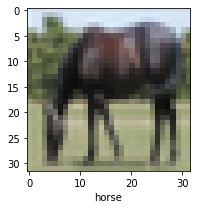

In [ ]:
show_image(x_test,y_test,6324)